# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Check the number of rows and columns
sales.shape

(1000, 17)

In [4]:
#Check the data type of each column
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Because Date here is object, we should convert it into datetime

In [5]:
sales['Date'] = pd.to_datetime(sales['Date'])
#Check the data types again to make sure
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

We can see here that the data type of Date has changed into datetime

In [ ]:
sales.set_index('Date',inplace =True)

In [6]:
#This is what our data looks like now
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Let's explore our data statistical summary, we can see the mean, median, std, etc. from each variable here

In [7]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Then check if there are nulls value in our data

In [8]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Good to see that our data has no missing value.
Now, let's get a look into our data correlation

In [9]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


The values for the gross margin percentage column are identical, that's why the correlation between gross margin percentage with other variables is 0 or NaN. So, we don't wan't to explore more about the correlation of the gross margin percentage.

In [10]:
#gross margin percentage is not included
new_sales = sales[['Unit price', 'Quantity','Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']]

In [11]:
#Round the correlation to make it easy to read
np.round(new_sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
gross income,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00


# Exploratory Data Analysis (Visualization)

To make the correlation easier to read, we can change the table above into this colorful map

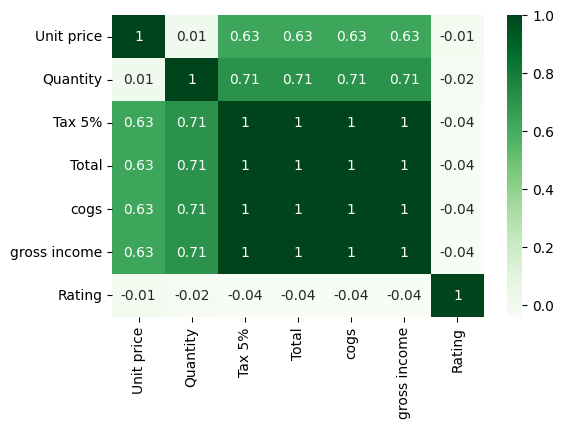

In [12]:
plt.figure(dpi=100)
sns.heatmap(np.round(new_sales.corr(),2),annot=True, cmap="Greens")
plt.show()

What we can see from the output above is the best correlated are Tax 5%, Total, cogs, and Gross Income. For example correlation between gross income with Total is 1 indicates a perfect positive correlation, a positive correlation means the two variables move in the same direction. The other best correlation is the quantity, the number 0,71 indicates there is a strong positive correlation there.




Let's see how the histogram for each variable looks like

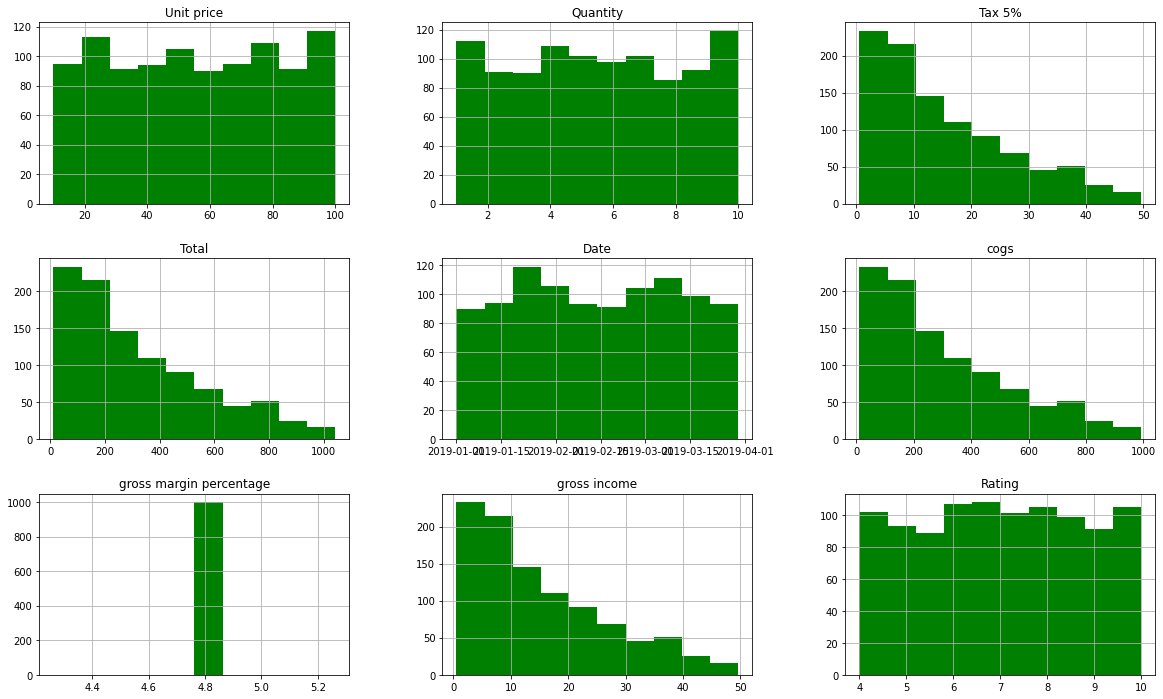

In [13]:
# Plotting Histogram for all
sales.hist(figsize=(20,12),color='green')
plt.show()

What we get from the histogram above:


*   Tax 5%, Total, cogs, and gross income have an identical histogram pattern (but not identical values), that's why they're perfectly correlated to each other.
*   The rating given by customers as a whole tends to be the same, many of them are satisfied and give a high rating, many are less satisfied and give a low rating.




**Which branch is the busiest?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


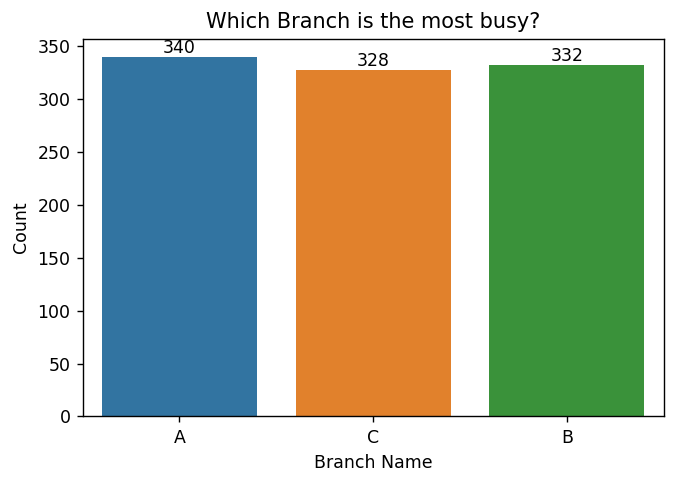

In [17]:
plt.figure(dpi=125)
ax=sns.countplot(sales['Branch'])
ax.bar_label(ax.containers[0])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
plt.show()

Branch A was the busiest among the other Branch

**Then, which payment method is most used?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


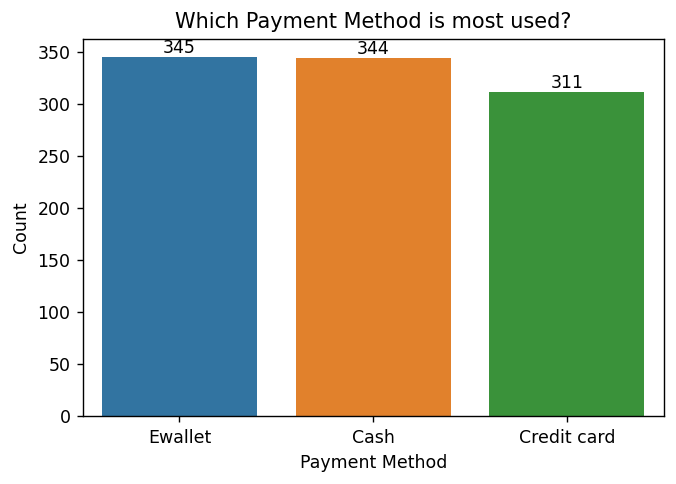

In [19]:
plt.figure(dpi=125)
ax2=sns.countplot(sales['Payment'])
ax2.bar_label(ax2.containers[0])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
plt.show()

The most commonly used payment method overall is Ewallet, but Cash also has almost the same popularity as Ewallet.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


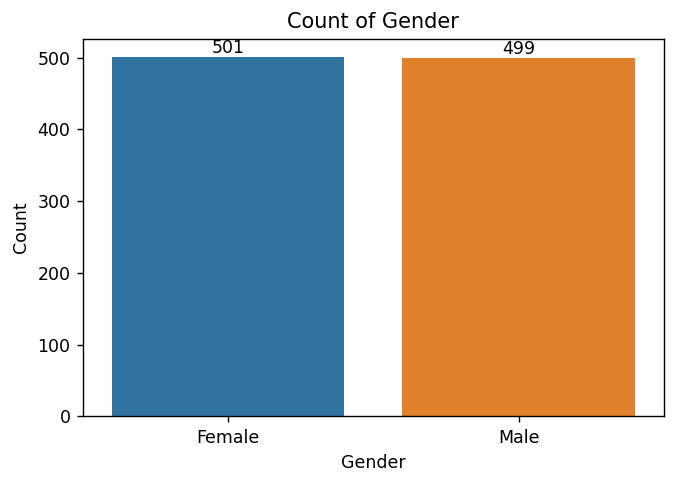

In [20]:
plt.figure(dpi=125)
ax3=sns.countplot(sales['Gender'])
ax3.bar_label(ax3.containers[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

The count of customers is almost the same for females and males.

**Next, we can jump deeper into the number of customers for each product type by its gender**

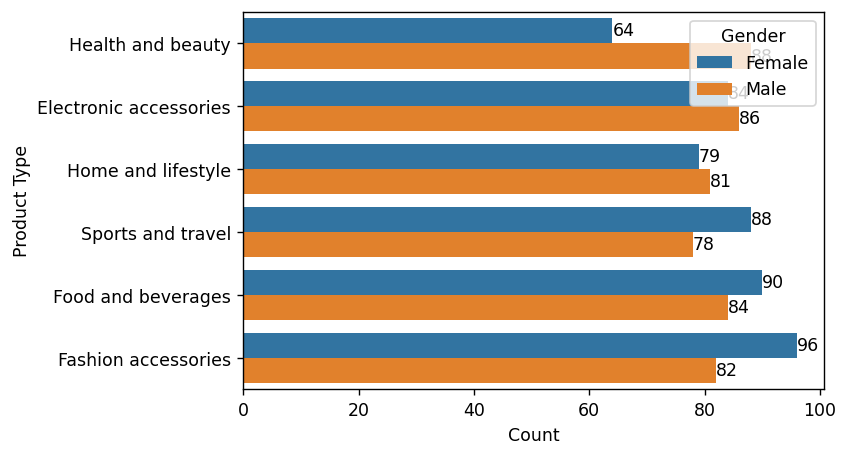

In [27]:
plt.figure(dpi=125)
ax4=sns.countplot(y ='Product line', hue = "Gender", data = sales) 
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Fashion accessories, Food and beverages, and Sports and travel are dominated by Female customers. While Health and beauty are dominated by Male customers.

**How about the number of customers for each product type by its city?**

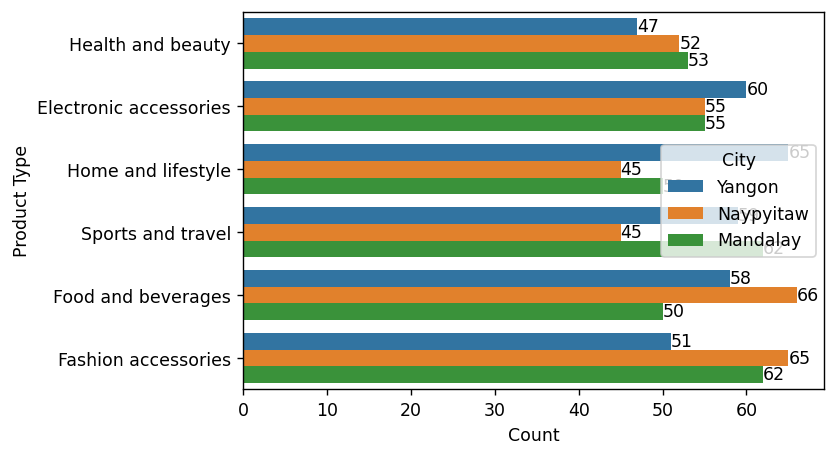

In [30]:
plt.figure(dpi=125)
ax5=sns.countplot(y ='Product line', hue = "City", data = sales) 
ax5.bar_label(ax5.containers[0])
ax5.bar_label(ax5.containers[1])
ax5.bar_label(ax5.containers[2])
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

*   Yangon leads at Home and Lifestyle & Electronic accessories
*   Nyapyitaw leads at Food & Bevaerages & Fashion accessories
*   Mandalay leads at Sports and Travel & Health and Beauty

**What's the most used payment method for each Branch?**

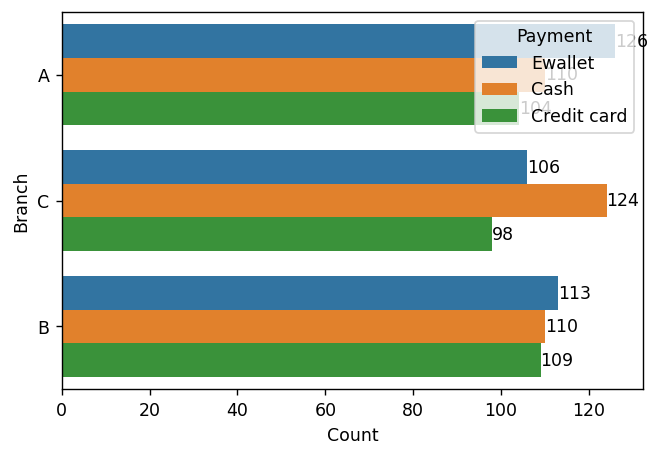

In [31]:
plt.figure(dpi=125)
ax6=sns.countplot(y ='Branch', hue = "Payment", data = sales)
ax6.bar_label(ax6.containers[0])
ax6.bar_label(ax6.containers[1])
ax6.bar_label(ax6.containers[2]) 
plt.xlabel('Count')
plt.ylabel('Branch')
plt.show()

*   In branch A, the most frequently used payment is Ewallet
*   In branch B, the frequency of use of the three payment instruments tends to be the same
*   In branch C, the most frequently used payment is Cash and the amount is quite significantly different from others